In [1]:
import settings
from Fit_HuberBraun_Matrix_5param_AVB_First import Fit_HuberBraun_Matrix_5param_AVB_First

In [2]:
settings.init()

In [3]:
params = [44, 0.000363000000000000, 5.45726102941647e-06, 0.00167208415554239,0.000660000000000000]
r1 = params[0]
ubestAVB = params[1:]
t, dorsalmuscle_V, ventralmuscle_V = Fit_HuberBraun_Matrix_5param_AVB_First(ubestAVB, r1)

In [4]:
import numpy as np

In [5]:
print(dorsalmuscle_V[:, -1] - ventralmuscle_V[:, -1])

[ 38.04296084  43.2692652   45.11221009  19.84514955  25.69166491
  23.66917736 -38.41512441 -39.40473149   2.51987698  26.05448257
  30.61056088  24.61640965 -25.84758444 -27.33108842   4.62979479
  20.54915438  23.50718997  18.3404397 ]


In [6]:
print(dorsalmuscle_V[:, 300] - ventralmuscle_V[:, 300])

[-20.58544745 -22.38213107  -6.59143113 -26.47546347 -30.42474252
  15.51287107  32.77924412  37.98920878  42.84474138  22.22530257
  27.74304109  24.5211454  -34.00010827 -35.00062549  -0.69311033
  21.86991849  24.98935565  19.31093739]


In [7]:
d_minus_v = dorsalmuscle_V - ventralmuscle_V

In [8]:
max_vals = np.array([])
min_vals = np.array([])
for i in range(len(d_minus_v)):
    max_vals = np.append(max_vals, np.max(d_minus_v[i, 200:]))
    min_vals = np.append(min_vals, np.min(d_minus_v[i, 200:]))

print(max_vals)
print(min_vals)

[43.18756215 48.46691457 47.46666509 41.33956042 46.50314247 44.34423464
 41.14117834 46.41868179 46.63712619 41.22078881 46.47658106 45.77904189
 41.3736194  46.61753553 40.67423316 42.90865448 48.13432055 39.0137402 ]
[-39.80446219 -41.66887073 -18.41411426 -39.46016825 -41.15733974
 -17.30284704 -40.7781411  -42.38370667 -23.01515029 -39.96469019
 -41.42140814 -20.12365268 -40.80475167 -42.13268383  -7.2399942
 -41.86908632 -43.24928858 -27.64851808]


In [ ]:
total_sin_vals = np.array([])
for i in range(len(d_minus_v)):
    sin_vals = np.array([])
    for j in range(12):
        sin_vals = np.append(sin_vals, np.array(d_minus_v[i][:]*(np.sin((j)*np.pi/10))))
    sin_vals = sin_vals.reshape(12, 600)
    if i == 0:
        total_sin_vals = np.append(total_sin_vals, sin_vals[0:6])
        prev = sin_vals.copy()
        total_sin_vals = total_sin_vals.reshape(6, 600)
        continue
    total_sin_vals = np.append(total_sin_vals, sin_vals[0:6] + prev[6:12])
    total_sin_vals = total_sin_vals.reshape(6*(i+1), 600)
    prev = sin_vals.copy()
    if i == 17:
        total_sin_vals = np.append(total_sin_vals, sin_vals[6:12])
        total_sin_vals = total_sin_vals.reshape(114, 600)

print(total_sin_vals.shape)

(114, 600)


In [10]:
import matplotlib.pyplot as plt

## Plotting a single timestep
### Appear to be some outliers and the data becomes a problem at the intersections of the segments

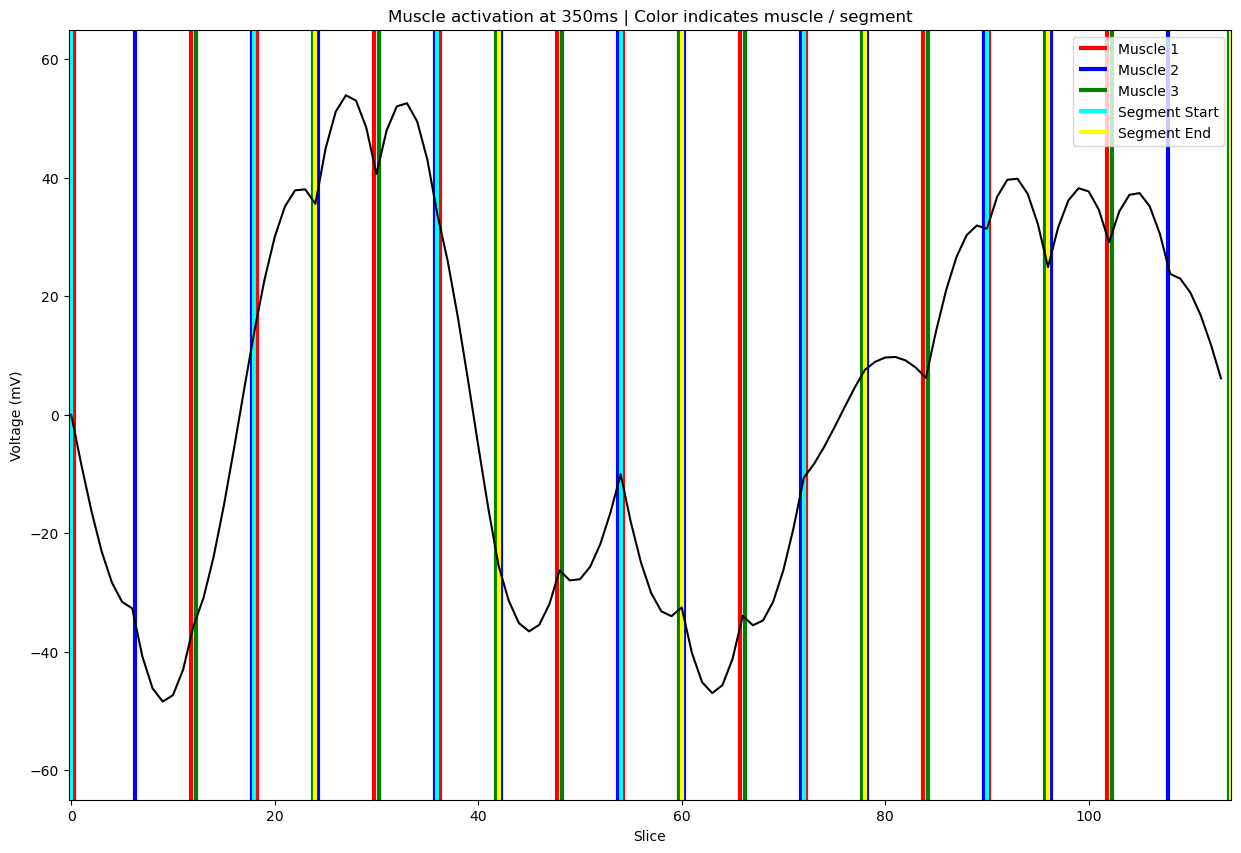

In [11]:
plt.figure(figsize=(15, 10))
plt.vlines(0.25, -65, 65, color="red", linewidth=3, label="Muscle 1")
plt.vlines(0, -65, 65, color="cyan", linewidth=3)
plt.vlines(6.25, -65, 65, color="blue", linewidth=3, label="Muscle 2")
plt.vlines(11.75, -65, 65, color="red", linewidth=3)
plt.vlines(12.25, -65, 65, color="green", linewidth=3, label="Muscle 3")
plt.vlines(17.75, -65, 65, color="blue", linewidth=3)
plt.vlines(18.25, -65, 65, color="red", linewidth=3)
plt.vlines(18, -65, 65, color="cyan", linewidth=3, label="Segment Start")
plt.vlines(23.75, -65, 65, color="green", linewidth=3)
plt.vlines(24.25, -65, 65, color="blue", linewidth=3)
plt.vlines(24, -65, 65, color="yellow", linewidth=3, label="Segment End")
plt.vlines(29.75, -65, 65, color="red", linewidth=3)
plt.vlines(30.25, -65, 65, color="green", linewidth=3)
plt.vlines(35.75, -65, 65, color="blue", linewidth=3)
plt.vlines(36.25, -65, 65, color="red", linewidth=3)
plt.vlines(36, -65, 65, color="cyan", linewidth=3)
plt.vlines(41.75, -65, 65, color="green", linewidth=3)
plt.vlines(42.25, -65, 65, color="blue", linewidth=3)
plt.vlines(42, -65, 65, color="yellow", linewidth=3)
plt.vlines(47.75, -65, 65, color="red", linewidth=3)
plt.vlines(48.25, -65, 65, color="green", linewidth=3)
plt.vlines(53.75, -65, 65, color="blue", linewidth=3)
plt.vlines(54.25, -65, 65, color="red", linewidth=3)
plt.vlines(54, -65, 65, color="cyan", linewidth=3)
plt.vlines(59.75, -65, 65, color="green", linewidth=3)
plt.vlines(60.25, -65, 65, color="blue", linewidth=3)
plt.vlines(60, -65, 65, color="yellow", linewidth=3)
plt.vlines(65.75, -65, 65, color="red", linewidth=3)
plt.vlines(66.25, -65, 65, color="green", linewidth=3)
plt.vlines(71.75, -65, 65, color="blue", linewidth=3)
plt.vlines(72.25, -65, 65, color="red", linewidth=3)
plt.vlines(72, -65, 65, color="cyan", linewidth=3)
plt.vlines(77.75, -65, 65, color="green", linewidth=3)
plt.vlines(78.25, -65, 65, color="blue", linewidth=3)
plt.vlines(78, -65, 65, color="yellow", linewidth=3)
plt.vlines(83.75, -65, 65, color="red", linewidth=3)
plt.vlines(84.25, -65, 65, color="green", linewidth=3)
plt.vlines(89.75, -65, 65, color="blue", linewidth=3)
plt.vlines(90.25, -65, 65, color="red", linewidth=3)
plt.vlines(90, -65, 65, color="cyan", linewidth=3)
plt.vlines(95.75, -65, 65, color="green", linewidth=3)
plt.vlines(96.25, -65, 65, color="blue", linewidth=3)
plt.vlines(96, -65, 65, color="yellow", linewidth=3)
plt.vlines(101.75, -65, 65, color="red", linewidth=3)
plt.vlines(102.25, -65, 65, color="green", linewidth=3)
plt.vlines(107.75, -65, 65, color="blue", linewidth=3)
plt.vlines(113.75, -65, 65, color="green", linewidth=3)
plt.vlines(114, -65, 65, color="yellow", linewidth=3)
plt.plot(total_sin_vals[:,325], color="Black")
plt.xlabel("Slice")
plt.ylabel("Voltage (mV)")
plt.title("Muscle activation at 350ms | Color indicates muscle / segment")
plt.xlim(-0.25, 114)
plt.ylim(-65, 65)
plt.legend()

## The different voltages achieved by each segment
### Muscle 3 of each segment does not appear to reach the same negative values as the others

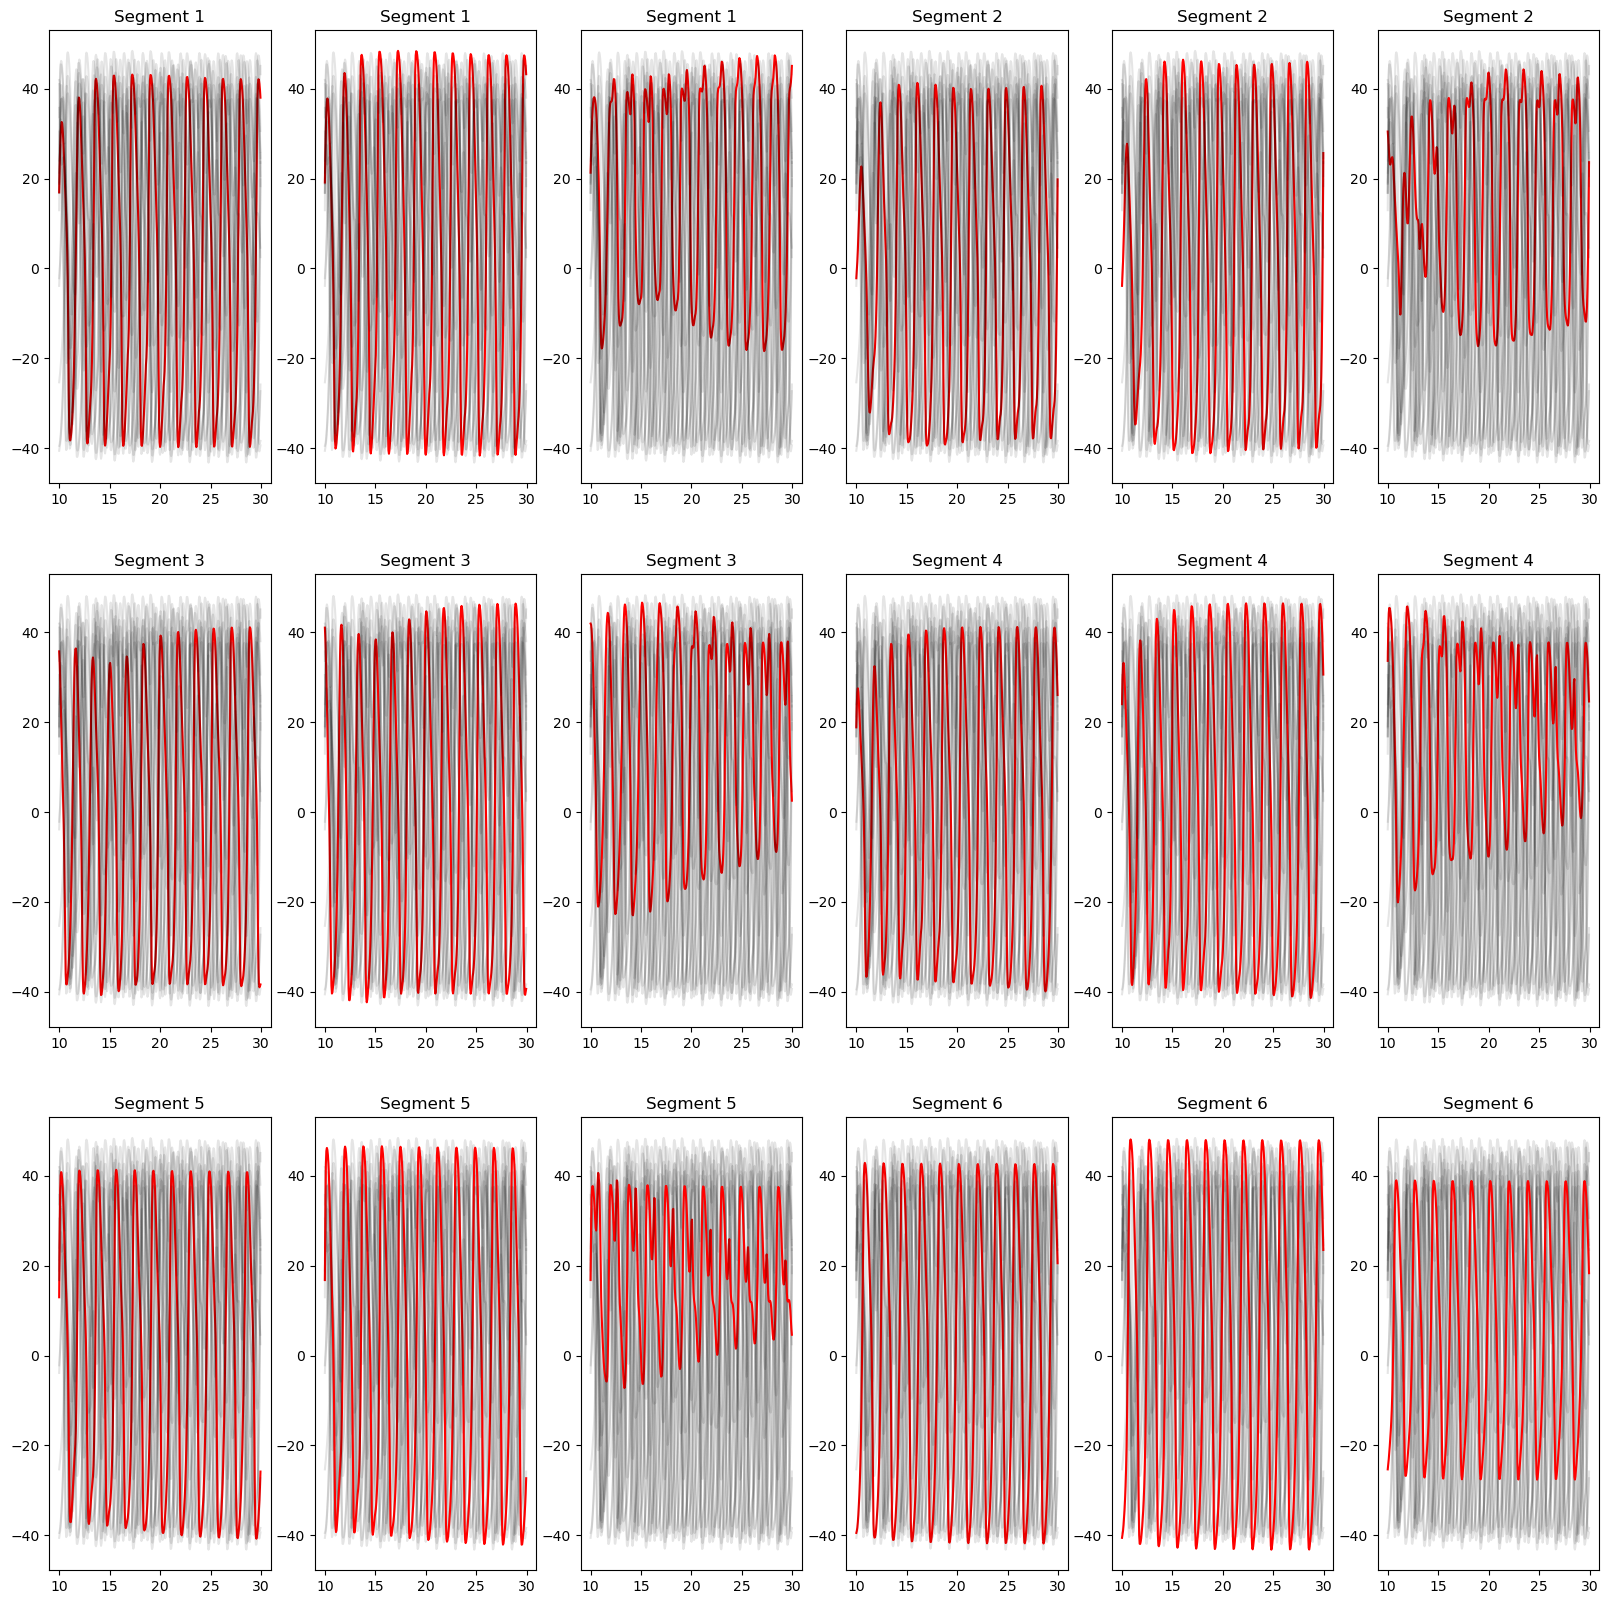

In [12]:
plt.figure(figsize=(20, 20))
for i in range(len(d_minus_v)):
    plt.subplot(3, 6, i+1)
    for j in range(len(d_minus_v)):
        if j == i:
            plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="red")
            continue
        plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="black", alpha=0.1)
    plt.title(f"Segment {i//3 + 1}")
plt.show()